In [1]:
# Import dependencies neeeded for the project
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics as stats
import numpy as np
from scipy.stats import linregress

In [2]:
# The instructions for uploading the data through an API request was detailed on the data website
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 60000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j2j3-acqj", limit=60000)

# Convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

results_df.head()

,parcel_s,building_name,building_address,postal_code,floor_area,property_type,property_type_self_selected,pim_link,year_built,energy_audit_due_date,...,_2011_energy_star_score,_2022_reason_for_exemption,_2021_reason_for_exemption,_2020_reason_for_exemption,_2019_district_steam_use_kbtu_,_2018_district_steam_use_kbtu_,_2022_district_steam_use_kbtu_,_2021_district_steam_use_kbtu_,_2020_district_steam_use_kbtu_,_2020_energy_star_score
0,3572/001,23088-San Francisco/Treat Ave,300 Treat Ave,94110,69700,Commercial,Self-Storage Facility,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1908,2021-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0010/001,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,133675,Commercial,Office,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2024-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1145/003-J,Dorraine Zief Law Library,2101 Fulton St,94117,67014,Commercial,College/University,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,NaN,2022-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010/002,Argonaut Hotel-SV,495 JEFFERSON ST,94109,180000,Commercial,Hotel,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2025-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9900/045-A,Pier 45 - Shed A,45 PIER - SHED A,94133,71455,Commercial - Port Facility,Parking,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1900,2099-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean up data by only keeping the specific rows we want for our data analysis
# Drop all rows with NaN or Not Available or 0
# Lump all commercial buildings into one type
clean_results_df = results_df.loc[:,['building_name', 'floor_area', 'property_type', 'property_type_self_selected','year_built', '_2022_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2022_total_ghg_emissions_intensity_kgco2e_ft2_', '_2021_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2021_total_ghg_emissions_intensity_kgco2e_ft2_', '_2020_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2020_total_ghg_emissions_intensity_kgco2e_ft2_', 'a_2019_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2019_total_ghg_emissions_intensity_kgco2e_ft2_', '_2018_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2018_total_ghg_emissions_intensity_kgco2e_ft2_']]
results_na = clean_results_df.replace("Not Available", np.nan)
results_na = clean_results_df.replace("0", np.nan)
clean_results_df = results_na.dropna()
clean_results_df = clean_results_df.replace("Commercial - Port Facility", "Commercial")
clean_results_df.head()


,building_name,floor_area,property_type,property_type_self_selected,year_built,_2022_weather_normalized_source_eui_kbtu_ft2_,_2022_total_ghg_emissions_intensity_kgco2e_ft2_,_2021_weather_normalized_source_eui_kbtu_ft2_,_2021_total_ghg_emissions_intensity_kgco2e_ft2_,_2020_weather_normalized_source_eui_kbtu_ft2_,_2020_total_ghg_emissions_intensity_kgco2e_ft2_,a_2019_weather_normalized_source_eui_kbtu_ft2_,_2019_total_ghg_emissions_intensity_kgco2e_ft2_,_2018_weather_normalized_source_eui_kbtu_ft2_,_2018_total_ghg_emissions_intensity_kgco2e_ft2_
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3,195.6,6.4,205,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [4]:
# Rename the columns in the data frame to make it easier to read

clean_results_df = clean_results_df.rename(columns = {'building_name':'Building Name', 'floor_area':'Floor Area ft2', 'property_type':'Property Type', 'property_type_self_selected': 'Property Subcategory','year_built':'Year Built', 
                                   '_2022_weather_normalized_source_eui_kbtu_ft2_':'2022 Source EUI (kBtu/ft2)', '_2022_total_ghg_emissions_intensity_kgco2e_ft2_':'2022 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2021_weather_normalized_source_eui_kbtu_ft2_':'2021 Source EUI (kBtu/ft2)', '_2021_total_ghg_emissions_intensity_kgco2e_ft2_':'2021 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2020_weather_normalized_source_eui_kbtu_ft2_':'2020 Source EUI (kBtu/ft2)', '_2020_total_ghg_emissions_intensity_kgco2e_ft2_':'2020 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   'a_2019_weather_normalized_source_eui_kbtu_ft2_':'2019 Source EUI (kBtu/ft2)', '_2019_total_ghg_emissions_intensity_kgco2e_ft2_':'2019 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2018_weather_normalized_source_eui_kbtu_ft2_':'2018 Source EUI (kBtu/ft2)', '_2018_total_ghg_emissions_intensity_kgco2e_ft2_':'2018 Total GHG Emissions Intensity (kGCO2e/ft2)'})

# Change the data type to float for all numerical entries
clean_results_df = clean_results_df.astype({'2022 Source EUI (kBtu/ft2)': 'float',
                                            '2022 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2021 Source EUI (kBtu/ft2)': 'float',
                                            '2021 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2020 Source EUI (kBtu/ft2)': 'float',
                                            '2020 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2019 Source EUI (kBtu/ft2)': 'float',
                                            '2019 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2018 Source EUI (kBtu/ft2)': 'float',
                                            '2018 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float'})



clean_results_df.head()

,Building Name,Floor Area ft2,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [5]:
# counts for each property type
property_type_counts = clean_results_df.groupby(['Property Type'])['Building Name'].count()
property_type_counts.sort_values(ascending=False)


Property Type
Commercial           604
Mixed Residential     83
Name: Building Name, dtype: int64

In [6]:
# counts for each subcategory type
property_subcategory_counts = clean_results_df.groupby(['Property Subcategory'])['Building Name'].count()
property_subcategory_counts.sort_values(ascending=False)

Property Subcategory
Office                                                   333
Multifamily Housing                                       73
Hotel                                                     47
Retail Store                                              31
Mixed Use Property                                        30
Other                                                     26
Worship Facility                                          15
Supermarket/Grocery Store                                 14
College/University                                        10
Medical Office                                             9
Non-Refrigerated Warehouse                                 7
Bank Branch                                                7
Restaurant                                                 5
Manufacturing/Industrial Plant                             5
K-12 School                                                5
Laboratory                                                 4
Str

Question #1: What property subcategory type has the highest source energy use intensity and greenhouse gas emissions per square footage in the year 2022?
Need to create two bar charts
X-Axis (property subcategory), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (property subcategory), Y-Axis (Source energy use intensity 2022)


/var/folders/3x/wkwr_9h52j1fsj5vplybvstr0000gn/T/ipykernel_15791/4025204754.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation= "vertical")


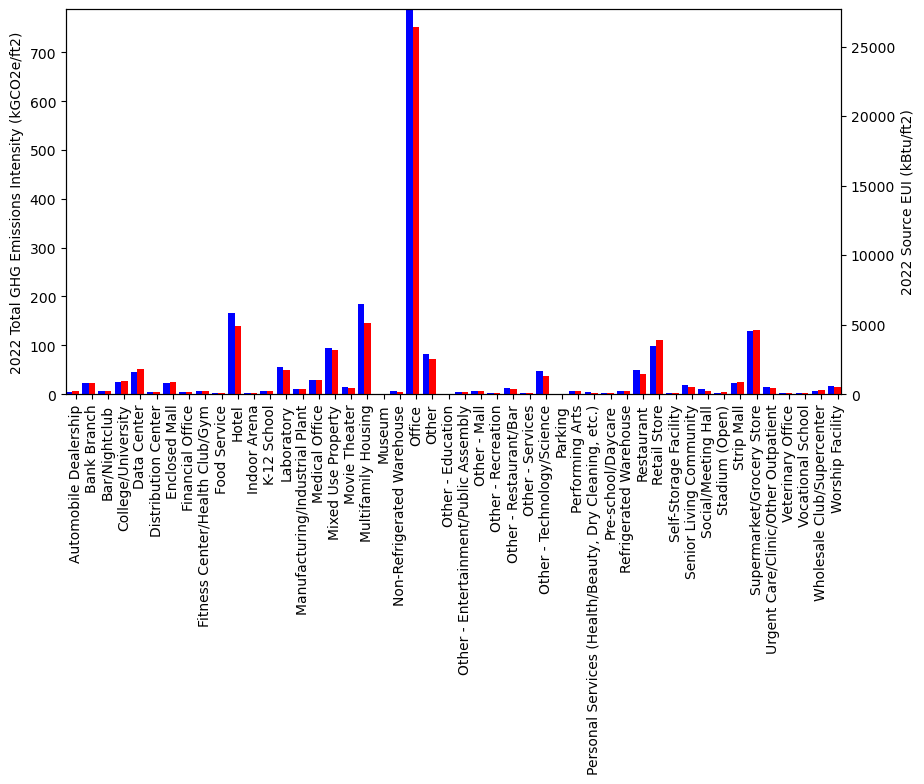

In [7]:

viz1 = clean_results_df.sort_values('Property Subcategory')
viz1 =viz1.reset_index(drop = True)
x = viz1['Property Subcategory'].unique()
x1 = np.arange(0,len(x),1)

y1 =viz1.groupby('Property Subcategory')['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].sum()
y2 = viz1.groupby('Property Subcategory')['2022 Source EUI (kBtu/ft2)'].sum()

fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
w = 0.4
ax.bar(x1-w,y1,width = w,color="b", align="center")
ax2.bar(x,y2,width = w,color="r", align="center")

ax.set_ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
ax2.set_ylabel('2022 Source EUI (kBtu/ft2)')
ax.set_xticklabels(x, rotation= "vertical")
ax.autoscale(tight=True)
plt.show()

/var/folders/3x/wkwr_9h52j1fsj5vplybvstr0000gn/T/ipykernel_15791/21354970.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation= "vertical")


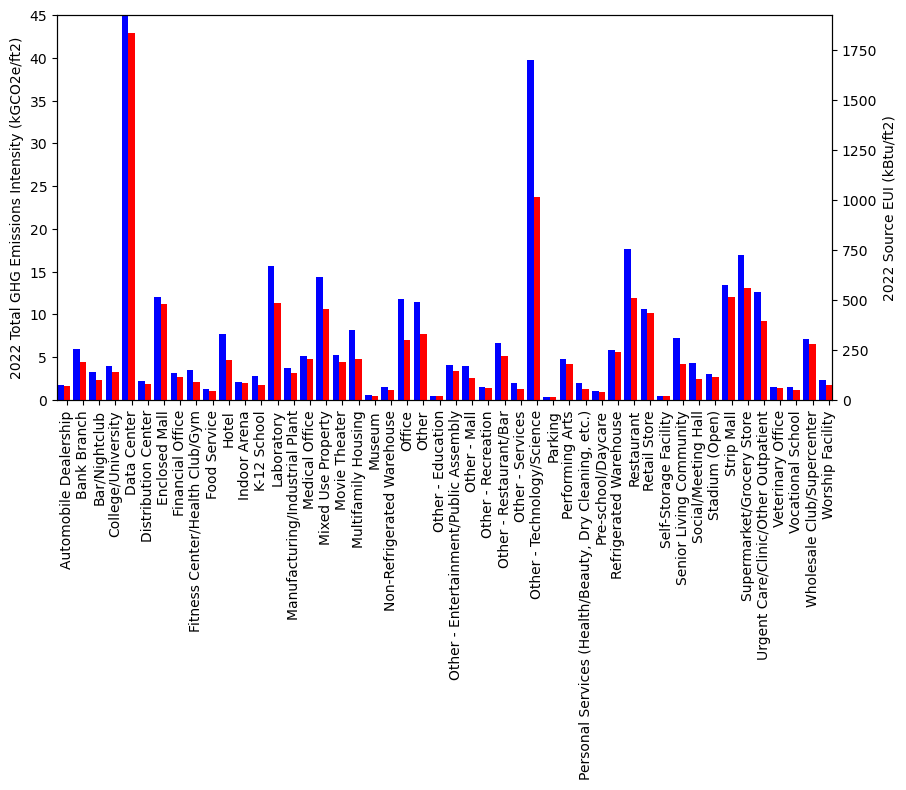

In [8]:
y1 = viz1.groupby('Property Subcategory')['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].max()
y2 = viz1.groupby('Property Subcategory')['2022 Source EUI (kBtu/ft2)'].max()
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
w = 0.4
ax.bar(x1-w,y1,width = w,color="b", align="center")
ax2.bar(x,y2,width = w,color="r", align="center")

ax.set_ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
ax2.set_ylabel('2022 Source EUI (kBtu/ft2)')
ax.set_xticklabels(x, rotation= "vertical")
ax.autoscale(tight=True)
plt.show()

#have to make bar plot for emissions/property_subcategory_counts 

Question # 2: For commercial buildings, check if there is a relationship between year built and greenhouse gas emission intensity, as well as year built and source energy use intensity in 2022
Need to create two line graphs
X-Axis (buckets for year built), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (buckets for year built), Y-Axis (Source energy use intensity 2022)

2017 1889


/var/folders/3x/wkwr_9h52j1fsj5vplybvstr0000gn/T/ipykernel_15791/1744165228.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation= "vertical")


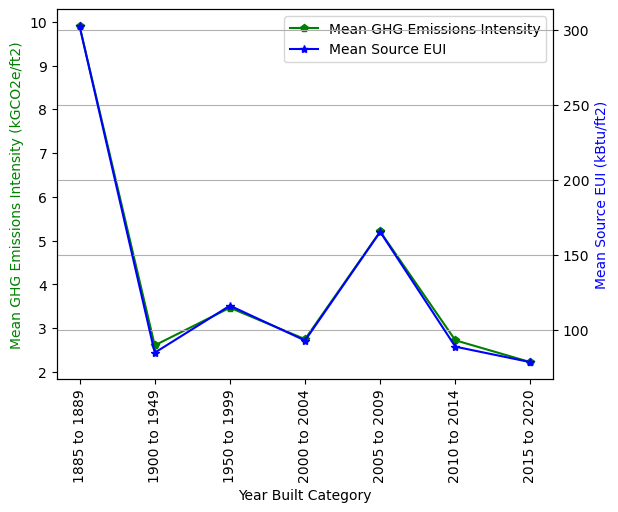

In [9]:
maxi = viz1['Year Built'].max()
mini = viz1['Year Built'].min()
print(maxi,mini)
# 45.0 1321.4
# Create bins in which to place values based upon IMDB vote count
bins = [1885, 1889, 1949, 1999, 2004, 2009, 2014, 2020]

# Create labels for these bins
group_labels = ["1885 to 1889", "1900 to 1949", "1950 to 1999", "2000 to 2004", "2005 to 2009", "2010 to 2014",
                "2015 to 2020"]

year_built = viz1['Year Built'].tolist()
viz1["Year Built Category"] = pd.cut(year_built, bins, labels=group_labels)
x = group_labels
y1 = viz1.groupby("Year Built Category")['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean()
y2 = viz1.groupby("Year Built Category")['2022 Source EUI (kBtu/ft2)'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
lns1 = ax1.plot(x,y1,"g", marker = "p", label = "Mean GHG Emissions Intensity")
lns2 = ax2.plot(x,y2,"b", marker = "*", label = "Mean Source EUI")
ax1.set_xlabel('Year Built Category')
ax1.set_ylabel('Mean GHG Emissions Intensity (kGCO2e/ft2)', color='g')
ax2.set_ylabel('Mean Source EUI (kBtu/ft2)', color='b')
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= "upper right")
ax1.set_xticklabels(x, rotation= "vertical")
plt.grid(True)
plt.show()

Question #3: Has the greenhouse gas emission intensity for commercial and residential buildings decreased since 2018?
Need to create two line graphs
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, commercial buildings)
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, residential buildings)

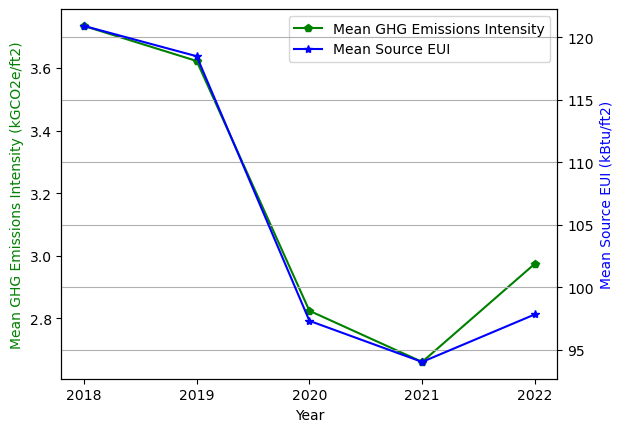

In [10]:
GHG_mean = [viz1['2018 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean(), 
            viz1['2019 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean(),
            viz1['2020 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean(),
            viz1['2021 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean(),
            viz1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].mean()]
EUI_mean = [viz1['2018 Source EUI (kBtu/ft2)'].mean(), 
            viz1['2019 Source EUI (kBtu/ft2)'].mean(),
            viz1['2020 Source EUI (kBtu/ft2)'].mean(),
            viz1['2021 Source EUI (kBtu/ft2)'].mean(),
            viz1['2022 Source EUI (kBtu/ft2)'].mean()]

years = ["2018", "2019", "2020","2021","2022"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
lns1 = ax1.plot(years,GHG_mean,"g", marker = "p", label = "Mean GHG Emissions Intensity")
lns2 = ax2.plot(years,EUI_mean,"b", marker = "*", label = "Mean Source EUI")
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean GHG Emissions Intensity (kGCO2e/ft2)', color='g')
ax2.set_ylabel('Mean Source EUI (kBtu/ft2)', color='b')
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= "upper right")

plt.grid(True)
plt.show()

Question #4: Is there a correlation between energy use and building floor area?
Need to create a bar graph
X-Axis (property type), Y-Axis (correlation value from correlation function between energy use and floor area)


Question #5:Boxplot the 2022 GHG and EUI. Then, calculate the quartiles and IQR, and list the potential outlying property subcategories for year 2022. 

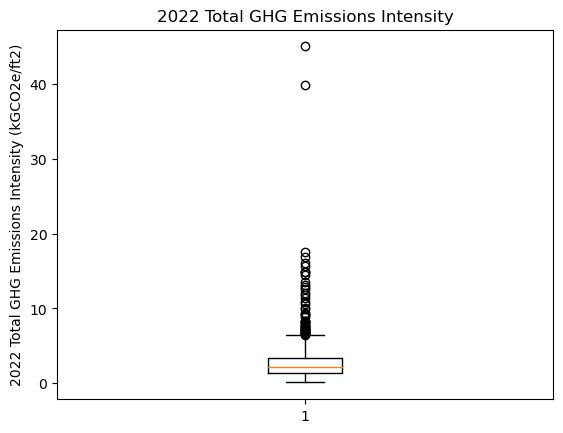

The lower quartile of 2022 Total GHG Emissions Intensity is: 1.4
The upper quartile of 2022 Total GHG Emissions Intensity is: 3.4
The interquartile range of 2022 Total GHG Emissions Intensity is: 2.0
The the median of 2022 Total GHG Emissions Intensity is: 2.2 
Values below -1.6 could be outliers.
Values above 6.4 could be outliers.
The outlier properties are: ['Data Center' 'Enclosed Mall' 'Hotel' 'Laboratory' 'Mixed Use Property'
 'Multifamily Housing' 'Office' 'Other' 'Other - Restaurant/Bar'
 'Other - Technology/Science' 'Restaurant' 'Retail Store'
 'Senior Living Community' 'Strip Mall' 'Supermarket/Grocery Store'
 'Urgent Care/Clinic/Other Outpatient' 'Wholesale Club/Supercenter']
Percentage of property subcategory that are outliers: = 35.42%
Subcategory that has maximum GHG Emissions Intensity is: Data Center


In [11]:

GHG_2022 = viz1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)']

fig1, ax1 = plt.subplots()
ax1.set_title('2022 Total GHG Emissions Intensity')
ax1.set_ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
ax1.boxplot(GHG_2022)
plt.show()

quartiles = GHG_2022.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 2022 Total GHG Emissions Intensity is: {lowerq}")
print(f"The upper quartile of 2022 Total GHG Emissions Intensity is: {upperq}")
print(f"The interquartile range of 2022 Total GHG Emissions Intensity is: {iqr}")
print(f"The the median of 2022 Total GHG Emissions Intensity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
out_df = viz1.loc[(GHG_2022 > upper_bound) | (GHG_2022 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = viz1['Property Subcategory'].nunique()
print(f'Percentage of property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_ghg = viz1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].idxmax()
print(f'Subcategory that has maximum GHG Emissions Intensity is: {viz1.iloc[maxindex_ghg,3]}')

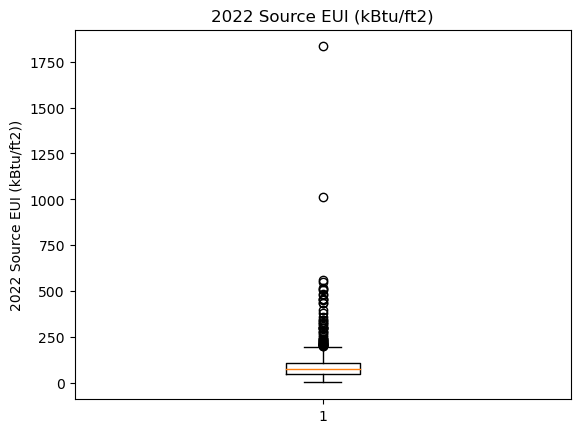

The lower quartile of 2022 Source EUI is: 49.05
The upper quartile of 2022 Source EUI is: 109.55
The interquartile range of 2022 Source EUI is: 60.5
The the median of 2022 Source EUI is: 76.1 
Values below -41.7 could be outliers.
Values above 200.3 could be outliers.
The outlier properties are: ['Data Center' 'Enclosed Mall' 'Laboratory' 'Medical Office'
 'Mixed Use Property' 'Multifamily Housing' 'Office' 'Other'
 'Other - Restaurant/Bar' 'Other - Technology/Science'
 'Refrigerated Warehouse' 'Restaurant' 'Retail Store' 'Strip Mall'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient'
 'Wholesale Club/Supercenter']
Percentage of property subcategory that are outliers: = 35.42%
Subcategory that has maximum Source EUI is: Data Center


In [12]:
EUI_2022 = viz1['2022 Source EUI (kBtu/ft2)']

fig1, ax1 = plt.subplots()
ax1.set_title('2022 Source EUI (kBtu/ft2)')
ax1.set_ylabel('2022 Source EUI (kBtu/ft2))')
ax1.boxplot(EUI_2022)
plt.show()

quartiles = EUI_2022.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 2022 Source EUI is: {lowerq}")
print(f"The upper quartile of 2022 Source EUI is: {upperq}")
print(f"The interquartile range of 2022 Source EUI is: {iqr}")
print(f"The the median of 2022 Source EUI is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
out_df = viz1.loc[(EUI_2022 > upper_bound) | (EUI_2022 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = viz1['Property Subcategory'].nunique()
print(f'Percentage of property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_eui = viz1['2022 Source EUI (kBtu/ft2)'].idxmax()
print(f'Subcategory that has maximum Source EUI is: {viz1.iloc[maxindex_eui,3]}')

In [13]:
plt.scatter(california_data['Longitude'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()

NameError: name 'california_data' is not defined